In [1]:
# %%capture
!pip install transformers sentence-transformers openai
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# **Data**

In [2]:
from datasets import load_dataset

# Load our data
data = load_dataset("imdb")
data

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
data["train"].shape

(25000, 2)

In [ ]:
data["train"][10000,0]

{'text': ["Someone actually gave this movie 2 stars. There's a very high chance they need immediate professional help as anyone who doesn't spend 30 seconds to see if you can award no stars is quite literally scary.<br /><br />This film is ... well ... I guess it's pretty much some kind of attempt at a horrible porn / snuff movie with no porn or no real horrible bits (apart from the acting, plot, story, sets, dialogue and sound). I wrongly assumed it was about zombies. <br /><br />Watching it is actually quite scary in fairness; you're terrified someone will come over and you'll never be able to describe what it is and they'll go away thinking you're a freak that watches home-made amateur torture videos or something along those lines. <br /><br />I'm so taken aback I'm writing this review on my mobile so I don't forget to attempt to bring the rating down further than the current 1.6 to save others from the same horrible fate that I just suffered. <br /><br />I worst film I've ever seen

In [ ]:
positive_reviews = data["train"].filter(lambda example: example["label"] == 1)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
positive_reviews[500,0]

{'text': ["Visually stunning and full of Eastern Philosophy, this amazing martial arts fantasy is brought to you by master director Tsui Hark, the man behind some of the best films Hong Kong cinema has produced. The special effects are beautiful and imaginative. The plot is a bit on the cerebral side, but is a refreshing change from films that treat their audience as if they were morons. If thinking is not your forte, however, this may not be your movie. Maybe you should go see the latest from the Hollywood studio's no brain club, but if you are looking for something more, he's where you will find it.",
  'Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn\'t really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I\'d have to say that The Third Man 

# **part 1 Text Classification with Representation Models**

## **Using a Task-specific Model**

In [ ]:
from transformers import pipeline

# Path to our HF model
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"

# Load model into pipeline
pipe = pipeline(
    model=model_path,
    tokenizer=model_path,
    return_all_scores=True,
    device="cuda:0",
    max_length=512

)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
import numpy as np
from tqdm import tqdm
from transformers.pipelines.pt_utils import KeyDataset

# Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "text")), total=len(data["test"])):
    negative_score = output[0]["score"]
    positive_score = output[2]["score"]
    assignment = np.argmax([negative_score, positive_score])
    y_pred.append(assignment)

100%|██████████| 25000/25000 [07:55<00:00, 52.62it/s]


In [ ]:
from sklearn.metrics import classification_report

def evaluate_performance(y_true, y_pred):
    """Create and print the classification report"""
    performance = classification_report(
        y_true, y_pred,
        target_names=["Negative Review", "Positive Review"]
    )
    print(performance)

In [ ]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.80      0.83      0.81     12500
Positive Review       0.82      0.79      0.81     12500

       accuracy                           0.81     25000
      macro avg       0.81      0.81      0.81     25000
   weighted avg       0.81      0.81      0.81     25000



# part 2 Sentiment Analysis app with streamlit

In [17]:
pip install streamlit transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.0 MB/s eta 0:00:00


In [18]:
!pip install transformers streamlit pyngrok -q

In [19]:
%%writefile sentiment_app.py
import streamlit as st
from transformers import pipeline

st.set_page_config(page_title="Sentiment Analysis", layout="centered")
st.title("💬 User Sentiment Analysis")

@st.cache_resource
def load_pipeline():
    model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    pipe = pipeline(
        task="sentiment-analysis",
        model=model_path,
        tokenizer=model_path,
        return_all_scores=True,
        top_k=None,
        device=-1  # CPU در Colab
    )
    return pipe

pipe = load_pipeline()

user_input = st.text_area("📝 Please enter your comment text:", height=150)

if st.button("🔍 Analyze Sentiment"):
    if not user_input.strip():
        st.warning("Please enter a valid text.")
    else:
        result = pipe(user_input)[0]
        result.sort(key=lambda x: x['score'], reverse=True)
        top = result[0]

        label_map = {
            "LABEL_0": "❌ Negative",
            "LABEL_1": "➖ Neutral",
            "LABEL_2": "✅ Positive"
        }

        st.markdown(f"### Result: {label_map.get(top['label'], top['label'])}")
        st.progress(min(int(top['score'] * 100), 100))

        st.markdown("#### 📊 Score Details:")
        for r in result:
            st.write(f"{label_map.get(r['label'], r['label'])} : {round(r['score'], 3)}")


Writing sentiment_app.py


In [20]:
!ngrok config add-authtoken ??? # put your key in ???


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [21]:
from pyngrok import ngrok
import os

ngrok.kill()

os.system("streamlit run sentiment_app.py &")

public_url = ngrok.connect(8501)
print("💡 Your app is available at this address:")
print(public_url)


💡 Your app is available at this address:
NgrokTunnel: "https://04f3135b99a2.ngrok-free.app" -> "http://localhost:8501"


**example of negative comment:**

I would put this at the top of my list of films in the category of unwatchable trash! There are films that are bad, but the worst kind are the ones that are unwatchable but you are suppose to like them because they are supposed to be good for you! The sex sequences, so shocking in its day, couldn't even arouse a rabbit.

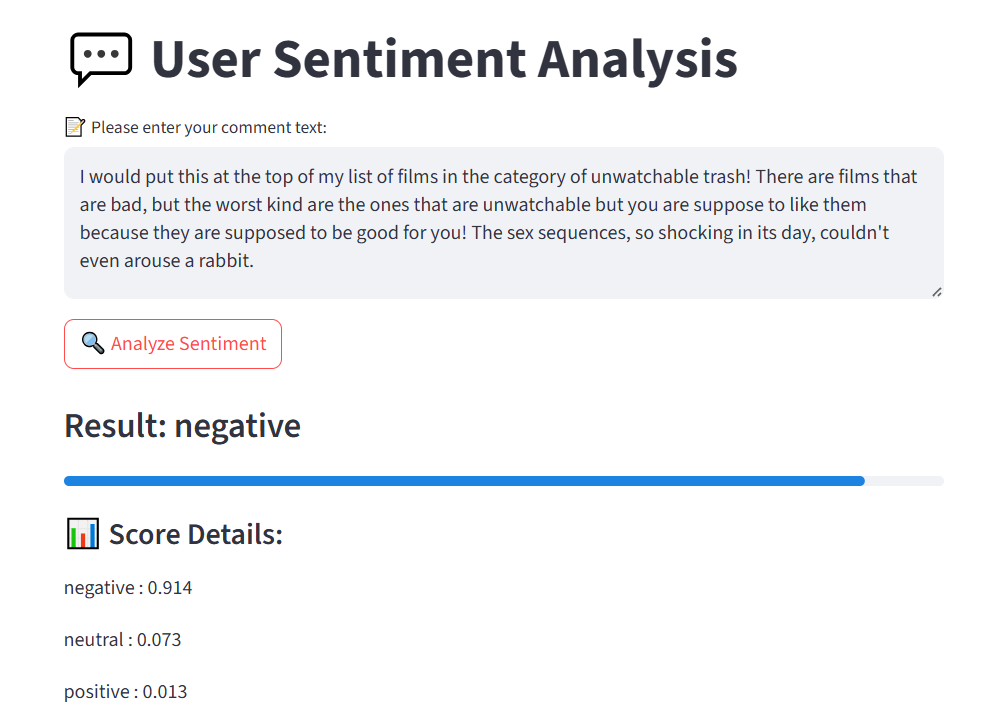

**example of positive comment:**

Visually stunning and full of Eastern Philosophy, this amazing martial arts fantasy is brought to you by master director Tsui Hark, the man behind some of the best films Hong Kong cinema has produced. The special effects are beautiful and imaginative. The plot is a bit on the cerebral side, but is a refreshing change from films that treat their audience as if they were morons. If thinking is not your forte, however, this may not be your movie. Maybe you should go see the latest from the Hollywood studio's no brain club, but if you are looking for something more, he's where you will find it.

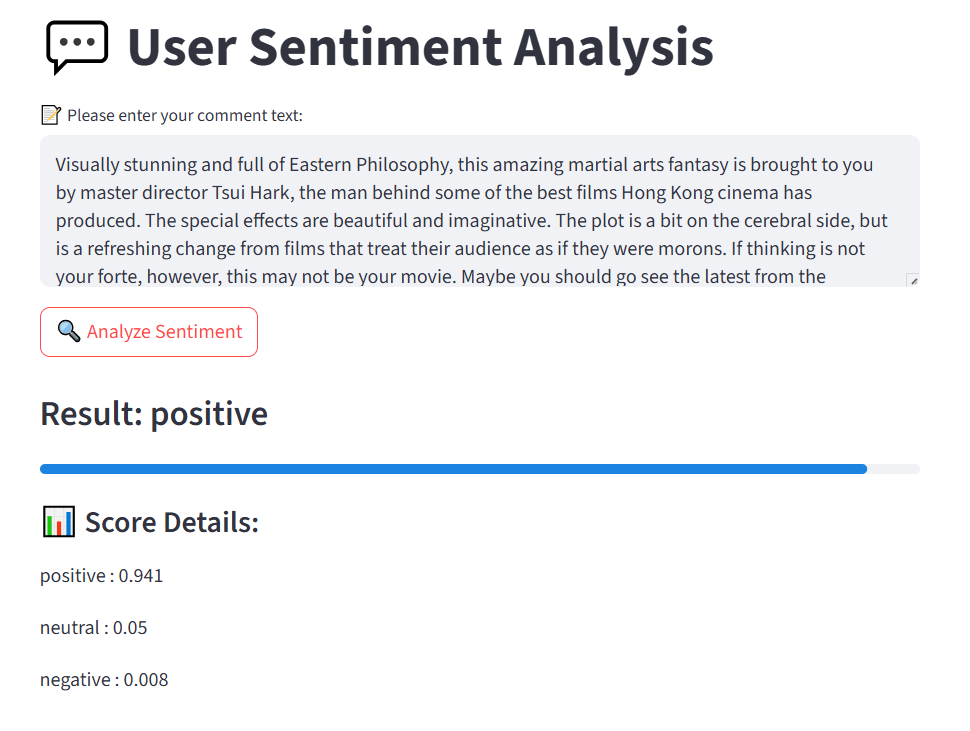

# part 3 using two other models
1. "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
2. "nlptown/bert-base-multilingual-uncased-sentiment"

In [ ]:
from datasets import load_dataset
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np
import torch

In [ ]:
from datasets import load_dataset

# Load our data
data = load_dataset("imdb")

In [ ]:

# Model info
model_path = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
device = 0 if torch.cuda.is_available() else -1

# Load pipeline
pipe = pipeline(
    "sentiment-analysis",
    model=model_path,
    tokenizer=model_path,
    device=device,
    truncation=True,
    max_length=512
)

# Inference: Predict for each sample in test set
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "text"), batch_size=16), total=len(data["test"])):
    label = output["label"]
    pred = 1 if label == "POSITIVE" else 0
    y_pred.append(pred)

# Evaluation
def evaluate_performance(y_true, y_pred):
    performance = classification_report(
        y_true, y_pred,
        target_names=["Negative Review", "Positive Review"]
    )
    print(performance)

evaluate_performance(data["test"]["label"], y_pred)


Device set to use cuda:0
100%|██████████| 25000/25000 [06:13<00:00, 66.98it/s]


                 precision    recall  f1-score   support

Negative Review       0.87      0.92      0.89     12500
Positive Review       0.91      0.86      0.89     12500

       accuracy                           0.89     25000
      macro avg       0.89      0.89      0.89     25000
   weighted avg       0.89      0.89      0.89     25000



In [ ]:
from datasets import load_dataset
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from sklearn.metrics import classification_report
from tqdm import tqdm
import torch

# Load data
data = load_dataset("imdb")

model_path = "nlptown/bert-base-multilingual-uncased-sentiment"
device = 0 if torch.cuda.is_available() else -1

# Load pipeline
pipe = pipeline(
    "sentiment-analysis",
    model=model_path,
    tokenizer=model_path,
    device=device,
    truncation=True
)

y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "text"), batch_size=16), total=len(data["test"])):
    label = output["label"]  #
    stars = int(label[0])    #

    if stars <= 2:
        pred = 0  #
    elif stars >= 4:
        pred = 1  #
    else:
        pred = -1

    y_pred.append(pred)

X = data["test"]
filtered_labels = []
filtered_preds = []
for i, p in enumerate(y_pred):
    if p != -1:
        filtered_labels.append(X["label"][i])
        filtered_preds.append(p)

def evaluate_performance(y_true, y_pred):
    performance = classification_report(
        y_true, y_pred,
        target_names=["Negative Review", "Positive Review"]
    )
    print(performance)

evaluate_performance(filtered_labels, filtered_preds)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 25000/25000 [12:03<00:00, 34.55it/s]


                 precision    recall  f1-score   support

Negative Review       0.91      0.93      0.92     10586
Positive Review       0.93      0.91      0.92     10423

       accuracy                           0.92     21009
      macro avg       0.92      0.92      0.92     21009
   weighted avg       0.92      0.92      0.92     21009



# **part 4 Using a summarizer**

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Average token length: 294.82
Maximum token length: 2974
Minimum token length: 10


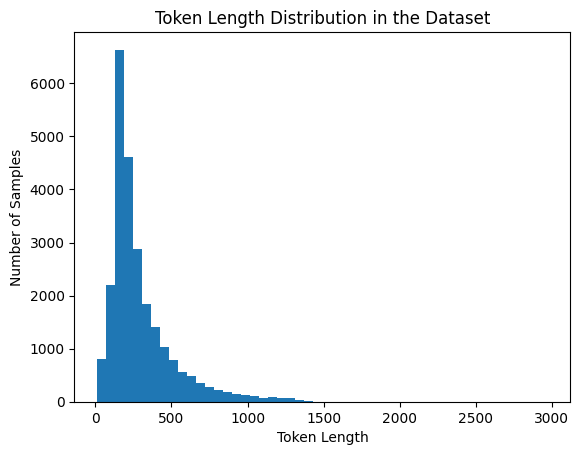

Ratio of samples with length > 512: 0.1277 (3193 out of 25000)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
lengths = [len(tokenizer.encode(sample)) for sample in data['test']['text']]

print(f"Average token length: {np.mean(lengths):.2f}")
print(f"Maximum token length: {np.max(lengths)}")
print(f"Minimum token length: {np.min(lengths)}")

# Plotting the histogram
plt.hist(lengths, bins=50)
plt.xlabel('Token Length')
plt.ylabel('Number of Samples')
plt.title('Token Length Distribution in the Dataset')
plt.show()

# Count how many have length > 512
count_over_512 = sum(l > 512 for l in lengths)

# Total number of samples
total_samples = len(lengths)

# Calculate ratio
ratio_over_512 = count_over_512 / total_samples

print(f"Ratio of samples with length > 512: {ratio_over_512:.4f} ({count_over_512} out of {total_samples})")


In [4]:
# Count how many have length > 512
count_over_512 = sum(l > 512 for l in lengths)

# Total number of samples
total_samples = len(lengths)

# Calculate ratio
ratio_over_512 = count_over_512 / total_samples

print(f"Ratio of samples with length > 512: {ratio_over_512:.4f} ({count_over_512} out of {total_samples})")

Ratio of samples with length > 512: 0.1277 (3193 out of 25000)


In [5]:
!pip install transformers

In [6]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [7]:
from transformers import pipeline, AutoTokenizer
from datasets import load_dataset
import torch

data = load_dataset("imdb", split="test")

device = 0 if torch.cuda.is_available() else -1
summarizer = pipeline("summarization", model="google/pegasus-xsum", device=device)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [8]:
from transformers import pipeline, AutoTokenizer
from datasets import load_dataset
import torch

data = load_dataset("imdb", split="test")  # یا "train"

device = 0 if torch.cuda.is_available() else -1
summarizer = pipeline(
    "summarization",
    model="t5-small",
    tokenizer="t5-small",
    device=device
)
tokenizer = AutoTokenizer.from_pretrained("t5-small")

def maybe_summarize(example, max_len=512):
    text = example["text"]
    input_text = "summarize: " + text.strip().replace("\n", " ")

    tokens = tokenizer.encode(input_text, truncation=True, max_length=512)

    if len(tokens) > max_len:
        summary = summarizer(
            input_text,
            max_new_tokens=512,
            min_length=400,
            do_sample=False
        )
        example["processed_text"] = summary[0]["summary_text"]
    else:
        example["processed_text"] = text
    return example

# 4. اعمال روی کل دیتاست با استفاده از map
data = data.map(maybe_summarize, batched=False)

# حالا دیتاست شما شامل ستون جدید "processed_text" هست
print(data[0]["processed_text"])


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they have to alway

In [9]:
from transformers import pipeline

# Path to our HF model
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"

# Load model into pipeline
pipe = pipeline(
    model=model_path,
    tokenizer=model_path,
    return_all_scores=True,
    device="cuda:0",
    max_length=512

)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return

In [10]:
data

Dataset({
    features: ['text', 'label', 'processed_text'],
    num_rows: 25000
})

In [11]:
import numpy as np
from tqdm import tqdm
from transformers.pipelines.pt_utils import KeyDataset

# Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(data, "processed_text")), total=len(data)):
    negative_score = output[0]["score"]
    positive_score = output[2]["score"]
    assignment = np.argmax([negative_score, positive_score])
    y_pred.append(assignment)

  0%|          | 14/25000 [00:01<21:47, 19.11it/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

100%|██████████| 25000/25000 [13:56<00:00, 29.88it/s]


In [12]:
from sklearn.metrics import classification_report

def evaluate_performance(y_true, y_pred):
    """Create and print the classification report"""
    performance = classification_report(
        y_true, y_pred,
        target_names=["Negative Review", "Positive Review"]
    )
    print(performance)

In [13]:
evaluate_performance(data["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.80      0.83      0.81     12500
Positive Review       0.82      0.79      0.81     12500

       accuracy                           0.81     25000
      macro avg       0.81      0.81      0.81     25000
   weighted avg       0.81      0.81      0.81     25000



In [16]:

# Model info
model_path = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
device = 0 if torch.cuda.is_available() else -1

# Load pipeline
pipe = pipeline(
    "sentiment-analysis",
    model=model_path,
    tokenizer=model_path,
    device=device,
    truncation=True,
    max_length=512
)

# Inference: Predict for each sample in test set
y_pred = []
for output in tqdm(pipe(KeyDataset(data, "processed_text"), batch_size=16), total=len(data)):
    label = output["label"]
    pred = 1 if label == "POSITIVE" else 0
    y_pred.append(pred)

# Evaluation
def evaluate_performance(y_true, y_pred):
    performance = classification_report(
        y_true, y_pred,
        target_names=["Negative Review", "Positive Review"]
    )
    print(performance)

evaluate_performance(data["label"], y_pred)


Device set to use cuda:0
100%|██████████| 25000/25000 [06:51<00:00, 60.76it/s]


                 precision    recall  f1-score   support

Negative Review       0.87      0.92      0.89     12500
Positive Review       0.91      0.86      0.89     12500

       accuracy                           0.89     25000
      macro avg       0.89      0.89      0.89     25000
   weighted avg       0.89      0.89      0.89     25000

